In [2]:
from sklearn.externals import joblib

In [3]:
import scipy.io
import numpy as np
import operator as op

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.rcParams['figure.figsize'] = list(map(lambda x: 2*x, matplotlib.rcParams['figure.figsize']))
matplotlib.style.use('ggplot')

In [5]:
data = joblib.load('/esat/bioidata/guests/wzhang/lymphoma_data_sets.pkl')

In [6]:
data.keys()

dict_keys(['data_matrix', 'data_matrix2', 'mzs', 'labels', 'grid2row', 'row2grid', 'xmin', 'xmax', 'ymin', 'ymax'])

In [7]:
data_matrix1 = data.get('data_matrix')
data_matrix2 = data.get('data_matrix2')
labels = data.get('labels')
mzs = data.get('mzs')
grid2row = data.get('gird2row')
row2grid = data.get('row2grid')
xmin = data.get('xmin')
xmax = data.get('xmax')
ymax = data.get('ymax')
ymin = data.get('ymin')

In [8]:
data_matrix1.shape

(520705, 999)

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


<Container object of 100 artists>

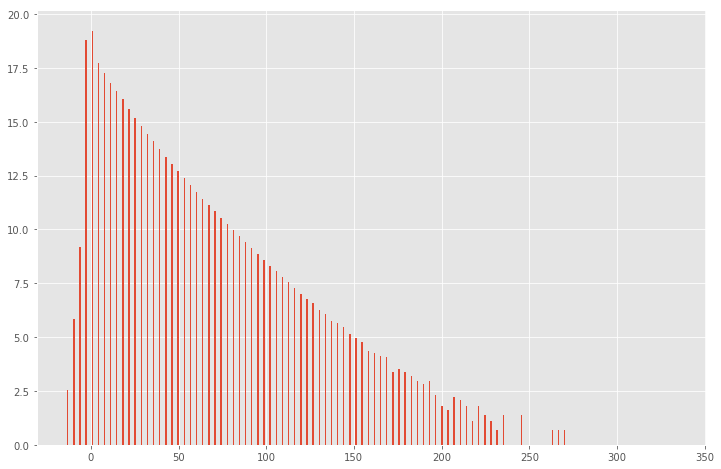

In [9]:
e, f = np.histogram(np.transpose(data_matrix1[:]),bins = 100)
plt.bar(f[:-1], np.log(e))

In [10]:
data_matrix2.shape

(520705, 999)

In [11]:
labels.shape

(520705,)

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


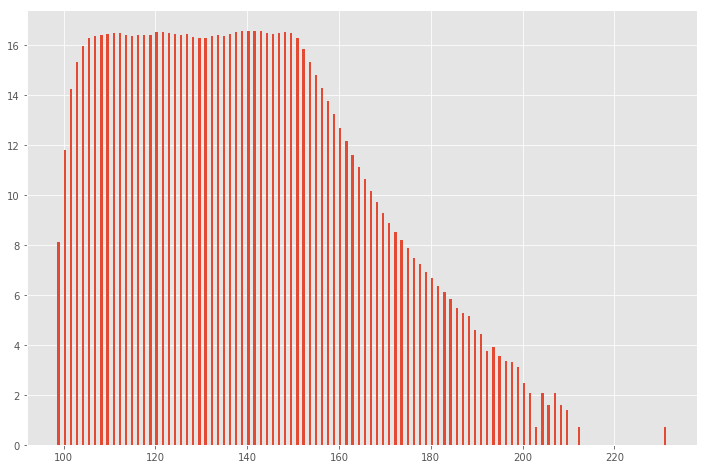

In [12]:
g, h = np.histogram(np.transpose(data_matrix2[:]),bins = 100)
plt.bar(h[:-1], np.log(g), 0.5)
plt.show()

# Normalization TIC

In [13]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_1_ = data_matrix1.astype(np.float64)
row_sums_1 = data_matrix_1_.sum(axis=1)
data_matrix_1 = data_matrix_1_ / row_sums_1[:, np.newaxis]
data_matrix_1.shape

(520705, 999)

In [14]:
#normalisation TIC: calculate the sum of all peaks' intensities in a spectrum as the normalization factor and then all spectrum intensities 
#are divided by this value
data_matrix_2_ = data_matrix2.astype(np.float64)
row_sums_2 = data_matrix_2_.sum(axis=1)
data_matrix_2 = data_matrix_2_ / row_sums_2[:, np.newaxis]
data_matrix_2.shape

(520705, 999)

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


<Container object of 100 artists>

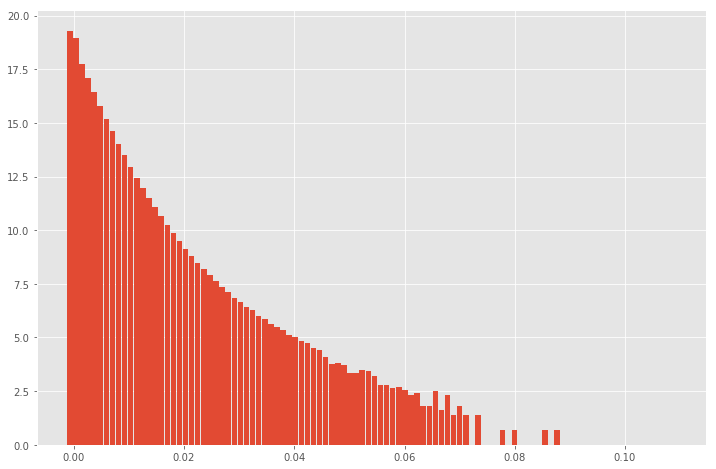

In [ ]:
a, b = np.histogram(np.transpose(data_matrix_1[:]),bins = 100)
#plt.bar(a[:], b[:-1])
# By default a bar plot will have a bar width of 0.8. So if your x-axis is from 0 to 0.2, then you will see shit.
plt.bar(b[:-1],np.log(a[:]), 0.001)

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


<Container object of 100 artists>

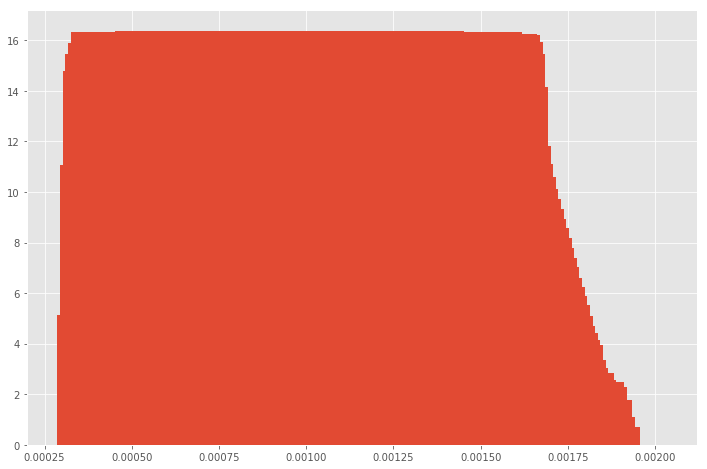

In [ ]:
c, d = np.histogram(np.transpose(data_matrix_2[:]),bins = 100)
plt.bar(d[:-1], np.log(c), 0.001)

# Feature Selection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
real_labels = np.concatenate((labels, labels), axis=0)
real_labels.shape

In [ ]:
real_data = np.concatenate((data_matrix_1, data_matrix_2), axis=0)
real_data.shape

In [ ]:
#peak-picking
#data_pp = SelectKBest(k=500).fit_transform(real_data, real_labels) # score function is f_classif
data_pp = SelectKBest(chi2,k=500).fit_transform(real_data, real_labels)

In [24]:
minvals_1 = np.amin(data_matrix_1, 0)
maxvals_1 = np.amax(data_matrix_1, 0)
ranges_1 = 1.0 / (maxvals_1 - minvals_1)
scaler_1 = np.diag(ranges_1)

data1 = np.dot(data_matrix_1, scaler_1)
data1.shape

(520705, 999)

In [25]:
minvals_2 = np.amin(data_matrix_2, 0)
maxvals_2 = np.amax(data_matrix_2, 0)
ranges_2 = 1.0 / (maxvals_2 - minvals_2)
scaler_2 = np.diag(ranges_2)

data2 = np.dot(data_matrix_2, scaler_2)
data2.shape

(520705, 999)

# SVM

In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import optunity
import optunity.metrics
import optunity.cross_validation

import numpy as np
from sklearn import linear_model

/esat/bioidata/guests/wzhang/wanqiu/conda/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


# Full data

In [27]:
#data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))

def nested_cv_data2_SVM():
    @optunity.cross_validated(x=data2, y=labels, num_folds=2,
                         aggregator=optunity.cross_validation.identity)
    def nested_cv_data2SVM(x_train, y_train, x_test, y_test):

    # extract spatial location of pixels (first 2 cols)
        x_train = x_train[:, 2:]
        rows = x_test[:, 0]
        cols = x_test[:, 1]
        x_test = x_test[:, 2:]
    
    # inner cross-validation to estimate performance of a set of hyperparameters
        @optunity.cross_validated(x=x_train, y=y_train, num_folds=3, num_iter=2)
        def inner_cv_data2SVM(x_train, y_train, x_test, y_test, C):
            model_SVM = LinearSVC(C=C).fit(x_train, y_train)
            predictions_SVM = model_SVM.decision_function(x_test)
            roc_SVM = optunity.metrics.roc_auc(y_test, predictions_SVM)
        #print('auroc in xval: %1.3f' % roc)
            return roc_SVM
    
        hpars, info, _ = optunity.maximize(inner_cv_data2SVM, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
    #print('')
    #print('Hyperparameters: ' + str(hpars))
    #print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
        model_SVM = LinearSVC(**hpars).fit(x_train, y_train)
        predictions_SVM = model_SVM.decision_function(x_test)
        auc_SVM = optunity.metrics.roc_auc(y_test, predictions_SVM)
        return (auc_SVM, np.vstack((rows, cols, predictions_SVM)),np.vstack((rows, cols, y_test)))

    res_SVM = nested_cv_data2SVM()
    roc_auc_SVM = sum(map(op.itemgetter(0), res_SVM)) / len(res_SVM)
    
    predictions_SVM = np.hstack(map(op.itemgetter(1), res_SVM))
    y_test_SVM = np.hstack(map(op.itemgetter(2), res_SVM))
    
    #print('')
    #print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc_SVM)
    return roc_auc_SVM, predictions_SVM, y_test_SVM


In [28]:
roc_auc_SVM, predictios_SVM, y_test_SVM = nested_cv_data2_SVM()
roc_auc_SVM

KeyboardInterrupt: 

# Paritai Data

In [27]:
from sklearn.model_selection import train_test_split

#data_2 = np.hstack((real_rows_xy_2, data_pp_scaled_2))

def nested_cv_data2_pSVM():
    
    # split data2 into 10% for training and 90% for testing
    X_trian_, X_test_, y_train_, y_test_ = train_test_split(data1, labels, test_size=0.95, random_state=0)
    
    #@optunity.cross_validated(x=X_trian_, y=y_train_, num_folds=2,
     #                    aggregator=optunity.cross_validation.identity)
    
    def nested_cv_data2SVM(X_trian_, y_train_, X_test_, y_test_):

    # extract spatial location of pixels (first 2 cols)
        X_trian_ = X_trian_[:, 2:]
        rows = X_test_[:, 0]
        cols = X_test_[:, 1]
        X_test_ = X_test_[:, 2:]
    
    # inner cross-validation to estimate performance of a set of hyperparameters
        @optunity.cross_validated(x=X_trian_, y=y_train_, num_folds=10, num_iter=2)
        def inner_cv_data2SVM(x_train, y_train, x_test, y_test, C):
            model_SVM = LinearSVC(C=C).fit(x_train, y_train)
            predictions_SVM = model_SVM.decision_function(x_test)
            roc_SVM = optunity.metrics.roc_auc(y_test, predictions_SVM)
        #print('auroc in xval: %1.3f' % roc)
            return roc_SVM
    
        hpars, info, _ = optunity.maximize(inner_cv_data2SVM, num_evals=10, C=[0, 10], pmap=optunity.parallel.pmap)
    #print('')
    #print('Hyperparameters: ' + str(hpars))
    #print('Cross-validated AUROC after tuning: %1.3f' % info.optimum)
        model_SVM = LinearSVC(**hpars).fit(X_trian_, y_train_)
        predictions_SVM = model_SVM.decision_function(X_test_)
        auc_SVM = optunity.metrics.roc_auc(y_test_, predictions_SVM)
        return (auc_SVM, np.vstack((rows, cols, predictions_SVM)),np.vstack((rows, cols, y_test_)))

    res_SVM = nested_cv_data2SVM(X_trian_, y_train_, X_test_, y_test_)
    #mean_roc_auc_SVM = sum(map(op.itemgetter(0), res_SVM)) / len(res_SVM)
    roc_auc_pSVM = res_SVM[0]
    #predictions_SVM = np.hstack(map(op.itemgetter(1), res_SVM))
    #y_test_SVM = np.hstack(map(op.itemgetter(2), res_SVM))
    predictions_pSVM = res_SVM[1]
    y_test_pSVM = res_SVM[2]
    #print('')
    #print('Mean area under ROC curve in outer cross-validation: %1.3f' % mean_roc_auc_SVM)
    return  roc_auc_pSVM, predictions_pSVM, y_test_pSVM



In [ ]:
roc_auc_pSVM, predictions_pSVM, y_test_pSVM = nested_cv_data2_pSVM()
roc_acu_pSVM